In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import urllib
import os.path
from pathlib import Path

In [2]:
# Use this for larger plots:
#matplotlib.rc('figure', figsize=(15, 10))
matplotlib.rc('figure', figsize=(10, 8))

<div style="text-align:center">
<h1>Numpy and Scipy</h1>

<br><br>
<img src="scipy-logo.png" style="width: 50%; margin: auto;">
</div>

# From previous lecture...

This could can be skipped for the slides, but we need the code to run the next examples.

In [3]:
def distance(point1, point2):
    """Calculate eukledian distance between two points. Points are passed
    as lists or arrays of length 2. Numpy arrays of many dimensions are 
    supported: axis=0 must be the dimension for x/y coordinates."""
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

In [4]:
def read_public_toilets():
    """Download CSV with geocordinates of public toilets in Vienna, parse it and return a numpy
    array of shape (N,2), where each point is (longitude_x, latitude_y)."""
    fname = Path('..') / 'data' / 'public-toilets.csv'
    if not os.path.exists(fname):
        URI = ('https://data.wien.gv.at/daten/geo?'
               'service=WFS&request=GetFeature&version=1.1.0&'
               'typeName=ogdwien:WCANLAGEOGD&srsName=EPSG:4326&outputFormat=csv')
        urllib.request.urlretrieve(URI, filename=fname)
        
    d = pd.read_csv(fname)
    return d.SHAPE.str.extract(r'POINT \((\d+\.\d+) (\d+\.\d+)\)').astype(float).values

In [5]:
def to_km(locations):
    LON_TO_KM = 74.1
    LAT_TO_KM = 111.19
    return (locations - stephansplatz) * [LON_TO_KM, LAT_TO_KM]

In [6]:
def google_maps_link(location):
    """Return link to turbine in Google maps.
    
    See documentation:
    https://developers.google.com/maps/documentation/urls/guide
    https://stackoverflow.com/questions/47038116/google-maps-url-with-pushpin-and-satellite-basemap

    """
    xlong, ylat = location
    
    # alternative API which does not allow marker
    # f"https://www.google.com/maps/@?api=1&map_action=map&center={ylat},{xlong}&basemap=satellite"
    
    # alternative API which does not allow sattelite
    # f"https://www.google.com/maps/search/?api=1&query={ylat},{xlong}"
    
    # zoom level z=xxx seems to be broken somehow (?)
    return f"http://maps.google.com/maps?q=loc:{ylat}+{xlong}&z=13"

In [7]:
stephansplatz = np.array([16.372223, 48.208432])

public_toilets = read_public_toilets()
public_toilets_km = to_km(public_toilets)

vienna = plt.imread(str(Path('..') / 'data' / 'vienna-map.png'))

you_are_here =  np.array([16.357709, 48.232303])

distances_to_me = distance(public_toilets_km.T, to_km(you_are_here))

closest_idx = distances_to_me.argmin()

# distance from Stephansplatz to borders of the PNG file in km
left = -13.682179147809752
right = 16.639373238835283
bottom = -9.81358722568525
top = 12.989326274442831
extent = left, right, bottom, top

closest_idx = distances_to_me.argmin()

# Indexing arrays in multiple dimensions

Until now we used indexing only this way:

In [8]:
public_toilets[0]

array([16.35523933, 48.18788499])

Numpy supports indexing also in more than one dimension:

In [9]:
public_toilets[0, 1]

48.18788499110965

The slice operations with `:` work also in multiple dimensions:

In [10]:
public_toilets[:3, 0:1]

array([[16.35523933],
       [16.25589972],
       [16.35651454]])

In [11]:
some_toilets = public_toilets[:4, :]
some_toilets

array([[16.35523933, 48.18788499],
       [16.25589972, 48.20254204],
       [16.35651454, 48.19659866],
       [16.47962036, 48.24201014]])

One can also pick more than one element at once by providing a list of indices:

In [12]:
public_toilets[[0,3,5]]

array([[16.35523933, 48.18788499],
       [16.47962036, 48.24201014],
       [16.36749292, 48.18704707]])

The later is also called [fancy indexing](https://scipy-lectures.org/intro/numpy/array_object.html#fancy-indexing).

# Adding a new axis

One can even create new dimensions:

In [13]:
some_toilets.shape

(4, 2)

In [14]:
some_toilets[:, :, np.newaxis].shape

(4, 2, 1)

In [15]:
some_toilets[:, :, np.newaxis]

array([[[16.35523933],
        [48.18788499]],

       [[16.25589972],
        [48.20254204]],

       [[16.35651454],
        [48.19659866]],

       [[16.47962036],
        [48.24201014]]])

# Let's do exercise 1!

# More advanced broadcasting

In [16]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

We can use `np.ones()` to create a column vector, i.e. an array of shape `(n, 1)`:

In [17]:
b = np.ones((5, 1)) * 2
b

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [18]:
b.shape

(5, 1)

In [19]:
a * b

array([[0., 2., 4., 6., 8.],
       [0., 2., 4., 6., 8.],
       [0., 2., 4., 6., 8.],
       [0., 2., 4., 6., 8.],
       [0., 2., 4., 6., 8.]])

# Operations with column and row vectors

<img src="numpy_broadcasting.png" width="800">


<small>

Source: [scipy lecture notes](http://scipy-lectures.org/intro/numpy/operations.html#broadcasting) (CC-BY 4.0)
    
</small>

# Numpy broadcasting rules

- operations with Numpy are (mostly) elementwise.
- if the shape does not match, the smaller array is duplicated along missing axis

    A      (2d array):  5 x 4
    B      (1d array):      1
    Result (2d array):  5 x 4

    A      (2d array):  5 x 4
    B      (1d array):      4
    Result (2d array):  5 x 4

    A      (3d array):  15 x 3 x 5
    B      (3d array):  15 x 1 x 5
    Result (3d array):  15 x 3 x 5

Full documentation:
https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

<small><strong>Hint:</strong> With more than two dimensions things get a bit confusing. Consider using `xarray` if you need hat often!</small>

# Fancy indexing with toilets 

Let's create a discrete grid covering Vienna. We will use a cartesian coordinate system in kilometers with origin at the Stephansplatz:

In [20]:
x = np.linspace(left, right, num=150)
y = np.linspace(bottom, top, num=150)

In [21]:
x[:5]

array([-13.68217915, -13.4786788 , -13.27517844, -13.07167809,
       -12.86817774])

`xx` is an 2D array where each element contains the x coordinate of corresponding grid point, `yy` contains the y coordinates:

In [22]:
xx, yy = np.meshgrid(x, y)

In [23]:
xx.shape

(150, 150)

In [24]:
yy.shape

(150, 150)

Note that all values in each column are the same, because the x coordinate does not change in that direction:

In [25]:
xx[:3, :3]

array([[-13.68217915, -13.4786788 , -13.27517844],
       [-13.68217915, -13.4786788 , -13.27517844],
       [-13.68217915, -13.4786788 , -13.27517844]])

To allow broadcasting between `public_toilets_km` and `xx` and `yy` new dimensions of size 1 are needed:

In [26]:
public_toilets_km.shape

(180, 2)

In [27]:
public_toilets_km_grid = public_toilets_km.T[:, :, np.newaxis, np.newaxis]
public_toilets_km_grid.shape

(2, 180, 1, 1)

In [28]:
grid = np.array([xx, yy])[:, np.newaxis, :, :]
grid.shape

(2, 1, 150, 150)

For each grid pixel there is a distance calculation to each toilet:

In [29]:
distances = distance(grid, public_toilets_km_grid)
distances.shape

(180, 150, 150)

Let's find the closest toilet for each grid pixel!

In [30]:
min_distance = distances.min(axis=0)

In [31]:
min_distance.shape

(150, 150)

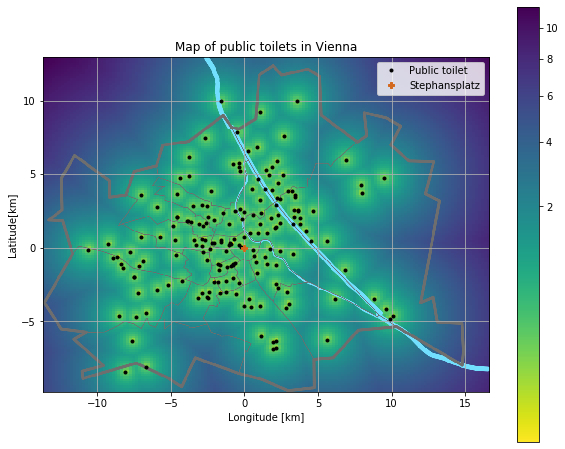

In [32]:
plt.plot(public_toilets_km.T[0], public_toilets_km.T[1], 'ko', markersize=3, label='Public toilet');
plt.plot([0], [0], 'P', label='Stephansplatz', color='chocolate')
plt.gca().set_aspect('equal')
plt.legend();
plt.title('Map of public toilets in Vienna')
plt.xlabel('Longitude [km]')
plt.ylabel('Latitude[km]')
plt.grid();

plt.imshow(min_distance, extent=extent, origin='lower',
           cmap='viridis_r',
           norm=matplotlib.colors.PowerNorm(0.35)
);
plt.colorbar();
plt.imshow(vienna, extent=extent);

# Let's do exercise 2 and 3!

# Filtering: Fancy indexing using boolean arrays

Last week we calculated the distance from our current position to each toilet and then created a boolean array which is `True` for each toilet closer than 1km:

In [33]:
len(distances_to_me)

180

In [34]:
distances_to_me < 1.

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [35]:
is_close_to_me = distances_to_me < 1.

This boolean array can be used to select entries of the array:

In [36]:
close_toilets = public_toilets_km[is_close_to_me]
close_toilets

array([[-0.2665495 ,  2.627774  ],
       [-0.66347781,  2.48285541],
       [-1.47044462,  2.33719483]])

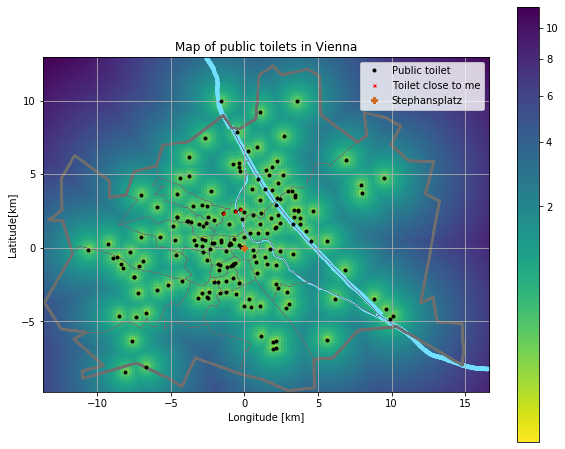

In [37]:
plt.plot(*public_toilets_km.T, 'ko', markersize=3, label='Public toilet');
plt.plot(*close_toilets.T, 'rx', markersize=3, label='Toilet close to me');

plt.plot([0], [0], 'P', label='Stephansplatz', color='chocolate')
plt.gca().set_aspect('equal')
plt.legend();
plt.title('Map of public toilets in Vienna')
plt.xlabel('Longitude [km]')
plt.ylabel('Latitude[km]')
plt.grid();

plt.imshow(min_distance, extent=extent, origin='lower',
           cmap='viridis_r',
           norm=matplotlib.colors.PowerNorm(0.35)
);
plt.colorbar();
plt.imshow(vienna, extent=extent);

# Worst spot for urgent needs

Which are the worst spots for urgent needs, where you should avoid drinking beer outside?

<small>(At the moment, drinking beer outside is still better than inside with someone you are not living together anyway!)</small>

In [38]:
from scipy.ndimage import maximum_filter

A maximum filter sets each element to the maximum value of its surroundings:

In [39]:
maximum_filter([1, 1, 1, 5, 1, 1, 1], size=3)

array([1, 1, 5, 5, 5, 1, 1])

This is a very neat trick to find local maxima in a discrete data set:

In [40]:
is_peak = maximum_filter(min_distance, 10) == min_distance

`is_peak` is True, if all the element is at least as large as all others in the surrounding. Such a point is a local maximum.

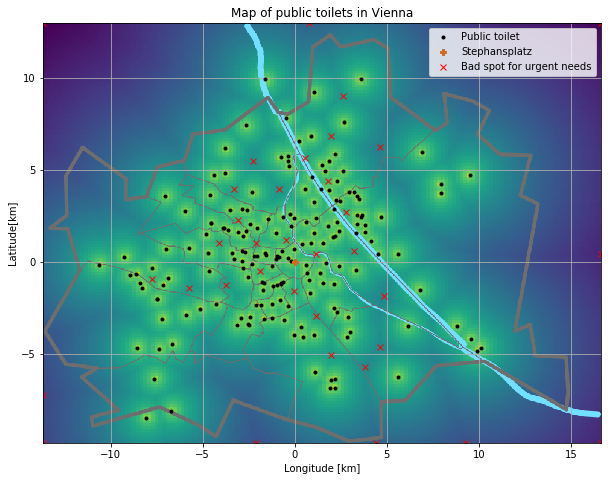

In [41]:
plt.plot(public_toilets_km.T[0], public_toilets_km.T[1], 'ko', markersize=3, label='Public toilet');
plt.plot([0], [0], 'P', label='Stephansplatz', color='chocolate')
plt.gca().set_aspect('equal')

plt.plot(xx[is_peak], yy[is_peak], 'rx', label='Bad spot for urgent needs')

plt.legend();
plt.title('Map of public toilets in Vienna')
plt.xlabel('Longitude [km]')
plt.ylabel('Latitude[km]')
plt.grid();

plt.imshow(min_distance, extent=extent, origin='lower',
           cmap='viridis_r',
           norm=matplotlib.colors.PowerNorm(0.35)
);

plt.imshow(vienna, extent=extent);

# Reshaping arrays

We got a discrete grid of points covering Vienna, each contains the distance to the closest toilet:

In [42]:
min_distance.shape

(150, 150)

In [43]:
min_distance.flatten()

array([ 5.76340084,  5.56578054,  5.36859959, ..., 10.64762609,
       10.77742198, 10.90946986])

In [44]:
min_distance.flatten().shape

(22500,)

# Histogram

How likely is it to be close to a public toilet?

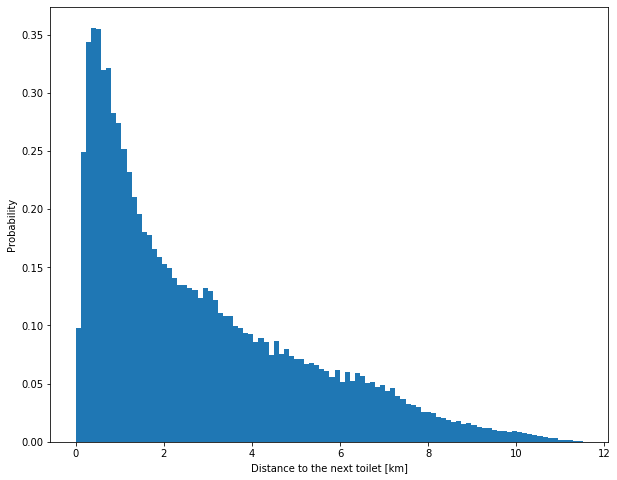

In [45]:
plt.hist(min_distance.flatten(), bins=100, density=True);
plt.xlabel('Distance to the next toilet [km]')
plt.ylabel('Probability');

But this uses all pixels in the grid... Wouldn't it be more interesting to look only at the center?

Let's filter the grid for all points closer to the center than 8km:

In [46]:
grid[:, 0].shape

(2, 150, 150)

Remember that the center is at `[0, 0]`:

In [47]:
is_central = distance(grid[:, 0], np.zeros((2, 1, 1))) < 8

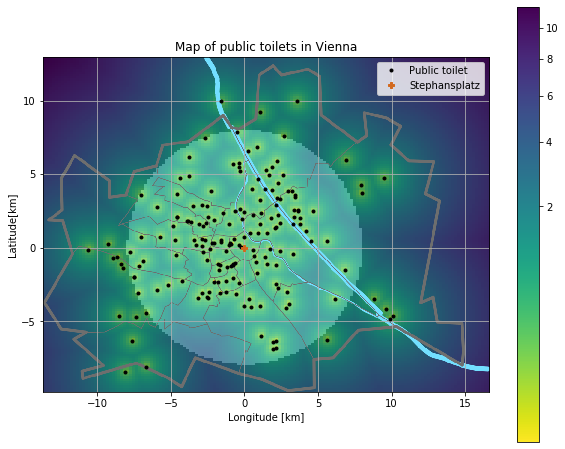

In [48]:
plt.plot(public_toilets_km.T[0], public_toilets_km.T[1], 'ko', markersize=3, label='Public toilet');
plt.plot([0], [0], 'P', label='Stephansplatz', color='chocolate')
plt.gca().set_aspect('equal')

plt.legend();
plt.title('Map of public toilets in Vienna')
plt.xlabel('Longitude [km]')
plt.ylabel('Latitude[km]')
plt.grid();

plt.imshow(min_distance, extent=extent, origin='lower',
           cmap='viridis_r',
           norm=matplotlib.colors.PowerNorm(0.35)
);

plt.colorbar();

plt.imshow(is_central,
           extent=extent,
           origin='lower',
           cmap='gray',
           alpha=0.2)

plt.imshow(vienna, extent=extent);

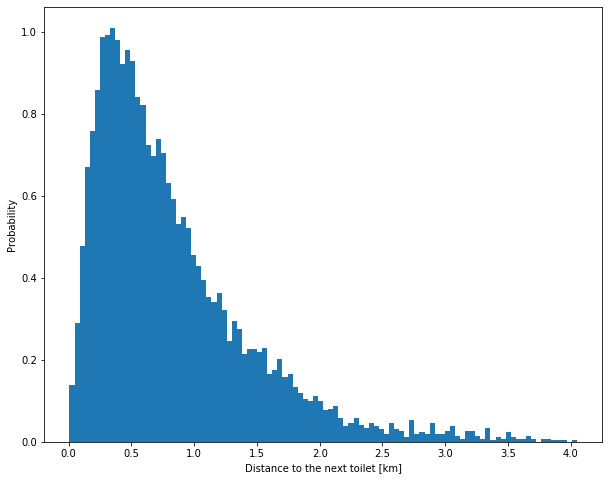

In [49]:
plt.hist(min_distance[is_central], bins=100, density=True);
plt.xlabel('Distance to the next toilet [km]')
plt.ylabel('Probability');

Note that the result is always flat when using a boolean array as index!

# Interpolation

Let's assume we got `min_distance` as dataset from somewhere else and we cannot compute the distance by calling `distance()`. How could we get a good value?

In [50]:
you_are_here_km = to_km(you_are_here)

Unfortunately the point does not lie on the grid:

In [51]:
you_are_here_km[0] in x

False

In [52]:
from scipy.interpolate import interp2d

In [53]:
distance_interpolated = interp2d(x, y, min_distance)

In [54]:
distance_interpolated(you_are_here_km[0], you_are_here_km[1])

array([0.43903215])

In [55]:
distance(you_are_here_km, public_toilets_km.T).min()

0.4462247392318615